# Movie Analysis Project: Regression, Classification, and Clustering Insights

Given that thousands of movies were produced each year, is there a better way for us to tell the greatness of movie without relying on critics or our own instincts?

Import Dependancies

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from sklearn.metrics import pairwise_distances


import warnings
warnings.filterwarnings("ignore") 

In [75]:
# import data
df_movie = pd.read_csv('movie_metadata.csv')
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Exploring Data Analysis

#### Inspect Data and Transform

In [76]:
df_movie.shape

(5043, 28)

In [77]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

#### a. Remove Unnecesarry Columns

In [78]:
# view all columns available
df_movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Columns we should drop: 
1. movie_title - higly unlikely to have influence on imdb score
2. dirctor_name - The directors influence is better represected by director_facebook_likes column thus we drop the name to reduce redunduncy
3. actor_names - The actors names influence is better represected by director_facebook_likes column thus we drop the name to reduce redunduncy
4. plot_keywords - The plot keywords are irrelevant in this case as they describe the type of genre the movie could be categorized in which we already have a column for
5. movie_imdb_link - We dont require to visit the link for any reference during this analysis

In [79]:
df_movie['country'].value_counts()

country
USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 65, dtype: int64

- Majority of the movies in the dataset are in the USA, so therefore the country is highly unlikely to influence the imdb_score.
- Drop country

In [80]:
df_movie['language'].value_counts()

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

- Seems like majority of  movies in the dataset  are in english language, drop language column

In [81]:
df_movie["color"].value_counts()

color
Color               4815
 Black and White     209
Name: count, dtype: int64

- Most movies are in color. We drop color column

In [82]:
# lets drop the identified columns
df_movie = df_movie.drop(columns=['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','plot_keywords','movie_imdb_link','genres','country','language','color'])

In [83]:
df_movie.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

#### b. Data Quality and Data Preparation

In [84]:
# Check for missing values
df_movie.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
actor_2_facebook_likes        13
facenumber_in_poster          13
actor_1_facebook_likes         7
cast_total_facebook_likes      0
num_voted_users                0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [85]:
# Handle the null values
df_movie = df_movie.dropna()
df_movie

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,R,7000.0,1992.0,20.0,6.9,1.37,0


In [86]:
# check for duplicates
mask = df_movie.duplicated(keep=False)

In [87]:
df_movie[mask]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
17,703.0,173.0,0.0,19000.0,26000.0,623279547.0,995415,87697,3.0,1722.0,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
63,248.0,110.0,282.0,103.0,11000.0,124051759.0,42372,21175,2.0,239.0,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
100,187.0,106.0,357.0,4000.0,23000.0,144512310.0,272223,45327,2.0,988.0,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
137,248.0,110.0,282.0,103.0,11000.0,124051759.0,42372,21175,2.0,239.0,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
145,256.0,111.0,456.0,394.0,20000.0,34964818.0,39956,21393,4.0,186.0,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,85.0,150.0,0.0,401.0,597.0,4414535.0,30618,1645,0.0,224.0,PG-13,18000000.0,1996.0,591.0,7.8,2.20,0
4313,52.0,85.0,54.0,455.0,985.0,13973532.0,11211,3065,1.0,92.0,PG-13,25000000.0,2002.0,637.0,5.1,1.85,215
4565,122.0,91.0,11.0,121.0,1000.0,45857453.0,82232,2323,3.0,174.0,R,3500000.0,1997.0,891.0,7.2,1.85,0
4631,393.0,101.0,0.0,888.0,3000.0,2319187.0,92640,5056,0.0,212.0,R,20000000.0,2013.0,1000.0,7.0,2.35,23000


In [88]:
len(df_movie[mask])

66

In [89]:
# There are 66 duplicates in the data
# lets drop the duplicates keeping the first one only
df_movie = df_movie.drop_duplicates(keep="first")

In [90]:
df_movie.shape

(3739, 17)

In [91]:
df_movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3.739000e+03,3.739000e+03,3739.000000,3739.000000,3739.000000,3.739000e+03,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000
mean,166.442632,110.225194,806.552822,762.668895,7712.839797,5.226328e+07,1.051120e+05,11452.569671,1.374432,334.574485,4.605896e+07,2003.001872,2002.713560,6.463974,2.110867,9271.568869
std,123.426612,22.657276,3070.449472,1865.249421,15531.626514,6.973288e+07,1.513910e+05,19083.542822,2.044175,410.700649,2.264805e+08,9.889856,4522.832518,1.054514,0.353523,21389.871169
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,76.000000,96.000000,11.000000,192.000000,742.500000,8.012936e+06,1.923500e+04,1898.500000,0.000000,108.000000,1.000000e+07,1999.000000,380.000000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,62.000000,434.000000,1000.000000,2.980276e+07,5.350800e+04,3994.000000,1.000000,209.000000,2.500000e+07,2005.000000,682.000000,6.600000,2.350000,226.000000
75%,223.500000,120.000000,234.000000,690.000000,13000.000000,6.670553e+07,1.277905e+05,16190.000000,2.000000,397.000000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [92]:
df_movie.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Data is now clean for analysis!

#### c. Correlation Analysis

#### Identify categorical and numerical variables

In [93]:
df_movie.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [94]:
# Identify numerical and categorical columns
num_columns = df_movie.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df_movie.select_dtypes(include=['object',]).columns

print('==Numerical=', num_columns, '==categorical==',cat_columns)

==Numerical= Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object') ==categorical== Index(['content_rating'], dtype='object')


In [95]:
for col in df_movie.columns:
    print(col,df_movie[col].nunique())

num_critic_for_reviews 527
duration 151
director_facebook_likes 395
actor_3_facebook_likes 882
actor_1_facebook_likes 716
gross 3654
num_voted_users 3690
cast_total_facebook_likes 3256
facenumber_in_poster 19
num_user_for_reviews 941
content_rating 12
budget 361
title_year 74
actor_2_facebook_likes 856
imdb_score 74
aspect_ratio 18
movie_facebook_likes 659


#### Perform correlation analysis

In [96]:
df_movie_corr = df_movie.copy()

In [97]:
#  convert categorical to dummy variables
df_movie_dum = pd.get_dummies(df_movie, columns=['content_rating'])
df_movie_dum.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,False,False,False,False,False,True,False,False,False,False
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,False,False,False,False,False,True,False,False,False,False
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,False,False,False,False,False,True,False,False,False,False
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,False,False,False,False,False,True,False,False,False,False
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,False,False,False,False,False,True,False,False,False,False


### What variables are correlated to imdb_score?

In [98]:
df_movie_corr.corr(numeric_only=True)['imdb_score'].sort_values()

title_year                  -0.132306
facenumber_in_poster        -0.067968
budget                       0.029728
aspect_ratio                 0.031380
actor_3_facebook_likes       0.064616
actor_1_facebook_likes       0.093377
actor_2_facebook_likes       0.100635
cast_total_facebook_likes    0.105950
director_facebook_likes      0.192939
gross                        0.215885
movie_facebook_likes         0.284223
num_user_for_reviews         0.324940
num_critic_for_reviews       0.349817
duration                     0.368440
num_voted_users              0.481805
imdb_score                   1.000000
Name: imdb_score, dtype: float64

- num_voted_users,duration,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes are highly positively correlated to imdb_score, suggesting movies with a high imdb score have high user attraction and tend to have a longer duration.
- There exists some low positive correlations between imdb_score and director_facebook_likes and actors facebook likes, this may suggest that director and actors influence may affect movie ratings score.      

### How are some key variables correlated to each other?

In [99]:
corr_output = df_movie_dum.corr(numeric_only=True)
corr_output

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
num_critic_for_reviews,1.000000,0.228774,0.176421,0.246156,0.167328,0.462518,0.592644,0.235513,-0.034569,0.563990,...,-0.006155,-0.005613,-0.000685,-0.016850,-0.108285,0.103626,-0.017553,0.013979,-0.055356,0.001661
duration,0.228774,1.000000,0.180585,0.121166,0.083533,0.243325,0.339365,0.118421,0.027158,0.352535,...,0.007057,0.016109,-0.012786,-0.009658,-0.098565,0.063363,-0.009038,0.036474,-0.008785,-0.044404
director_facebook_likes,0.176421,0.180585,1.000000,0.120858,0.090907,0.140333,0.303157,0.120548,-0.047291,0.219387,...,-0.003860,-0.005535,-0.007943,-0.014839,0.001018,0.005499,-0.006900,0.013969,-0.017980,-0.011771
actor_3_facebook_likes,0.246156,0.121166,0.120858,1.000000,0.252864,0.281780,0.258183,0.485895,0.104949,0.201167,...,-0.005154,-0.005472,-0.009365,-0.030820,0.007157,0.094255,-0.009339,-0.070651,-0.025931,-0.014774
actor_1_facebook_likes,0.167328,0.083533,0.090907,0.252864,1.000000,0.143776,0.179088,0.946115,0.056036,0.122663,...,-0.007866,-0.010415,-0.006865,-0.038654,-0.011577,0.057486,-0.013436,-0.015948,-0.036677,0.002206
gross,0.462518,0.243325,0.140333,0.281780,0.143776,1.000000,0.623507,0.229180,-0.033739,0.546710,...,-0.001985,0.003415,-0.027477,-0.067441,0.151576,0.168084,-0.016769,-0.265077,-0.052416,-0.024959
num_voted_users,0.592644,0.339365,0.303157,0.258183,0.179088,0.623507,1.000000,0.244965,-0.035206,0.779661,...,-0.003335,0.000138,-0.016513,-0.047669,-0.053717,0.066098,-0.000983,-0.005569,-0.041378,-0.016110
cast_total_facebook_likes,0.235513,0.118421,0.120548,0.485895,0.946115,0.229180,0.244965,1.000000,0.078550,0.177592,...,-0.008870,-0.011498,-0.011053,-0.046607,-0.009999,0.078326,-0.015350,-0.030396,-0.042780,-0.005501
facenumber_in_poster,-0.034569,0.027158,-0.047291,0.104949,0.056036,-0.033739,-0.035206,0.078550,1.000000,-0.081792,...,0.005006,0.001421,-0.017152,-0.003764,-0.024928,0.069218,0.031780,-0.027608,-0.001024,0.000648
num_user_for_reviews,0.563990,0.352535,0.219387,0.201167,0.122663,0.546710,0.779661,0.177592,-0.081792,1.000000,...,-0.002333,0.002587,-0.010714,-0.048409,-0.090162,0.100087,-0.007124,-0.000084,-0.040684,0.002538


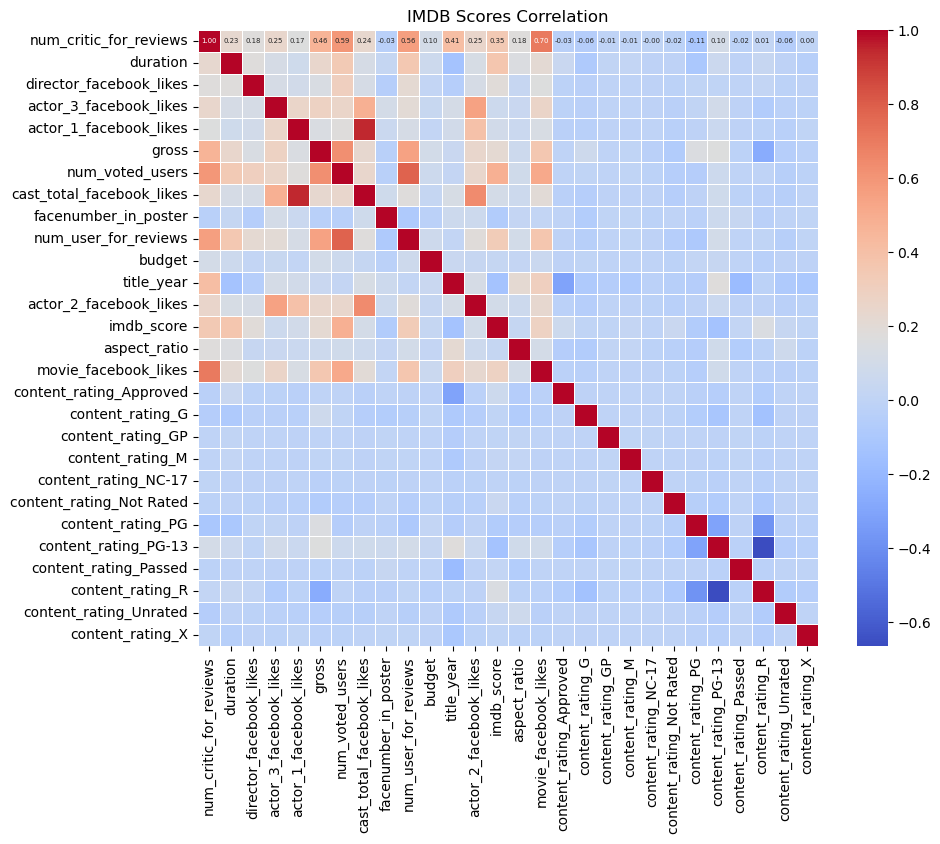

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_output, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title('IMDB Scores Correlation')
plt.show()

1. positive correlation
   - gross and budget
   - Num_voted_users and gross
   - Num_of_critics_reviews and num_voted_users
   - Num_voted_users and movie_facebook_likes
   - Director_facebook_likes and num_critics_reviews
   - actor_1_facebook_likes and cast_total_facebook_likes
2. negative correlation
   - facenumber_in_poster and num_critic_for_reviews,num_voted_users,gross,num_user_for_reviews

### Regression

In [101]:
df_movie.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [102]:
# Set X features and y variable
X = df_movie.drop('imdb_score', axis=1)
y = df_movie['imdb_score']

print(X.shape, y.shape)


(3739, 16) (3739,)


##### Model Validation

In [103]:
# Splitting the data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2991, 16) (748, 16) (2991,) (748,)


#### Data Preprocessing

In [104]:
# Standardize numerical value
num_cols =['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes']

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])


In [105]:
pd.DataFrame(X_train_num_scaled).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.072419,-0.848993,-0.200229,-0.117164,0.378715,0.334325,-0.288322,0.794224,0.307630,-0.169013,0.132063,0.822664,1.93783,-0.938920,-0.439506
1,1.514292,-0.584974,-0.241405,-0.234592,-0.415101,1.454467,0.728723,-0.437667,0.791394,0.157290,-0.114052,1.127343,-0.25930,0.898786,0.574413


In [106]:
# Encode categorical

# Encode categorical variables to numerical 
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train[cat_columns]).toarray()
X_test_cat_encoded = encoder.transform(X_test[cat_columns]).toarray()

In [107]:
X_train[cat_columns].head(2)

,content_rating
514,PG
2391,R


In [108]:
pd.DataFrame(X_train_cat_encoded).head(2) 

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [109]:
# Convert the scaled numerical features back to a DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

# Convert the encoded categorical features back to a DataFrame
# Get the new column names from the OneHotEncoder
cat_cols_encoded = encoder.get_feature_names_out(cat_columns)
X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=cat_cols_encoded, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=cat_cols_encoded, index=X_test.index)

In [110]:
X_train_num_df.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
514,-0.072419,-0.848993,-0.200229,-0.117164,0.378715,0.334325,-0.288322,0.794224,0.307630,-0.169013,0.132063,0.822664,1.93783,-0.938920,-0.439506
2391,1.514292,-0.584974,-0.241405,-0.234592,-0.415101,1.454467,0.728723,-0.437667,0.791394,0.157290,-0.114052,1.127343,-0.25930,0.898786,0.574413


In [111]:
X_train_cat_df.head(2)

,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
514,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
# Concatenate the numerical and categorical DataFrames
X_train_preprocessed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_preprocessed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [113]:
X_test_preprocessed.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
1228,-0.528090,-0.100938,-0.179641,0.024378,-0.228178,0.036166,-0.177347,-0.145671,-0.659900,-0.475689,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
570,0.562265,-0.012932,-0.103215,-0.165393,-0.288867,-0.059751,-0.021279,-0.316848,-0.176135,-0.107678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Model building

##### Training using  Linear Regression

In [114]:
linear_model = LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [115]:
coefficients = pd.DataFrame(linear_model.coef_, index=X_train_preprocessed.columns, columns=['Coefficient'])
print(coefficients)


                           Coefficient
num_critic_for_reviews        0.337291
duration                      0.248869
director_facebook_likes       0.016418
actor_3_facebook_likes        0.107953
actor_1_facebook_likes        1.023151
gross                        -0.101615
num_voted_users               0.547015
cast_total_facebook_likes    -1.213201
facenumber_in_poster         -0.032028
num_user_for_reviews         -0.250400
budget                       -0.005231
title_year                   -0.191943
actor_2_facebook_likes        0.292057
aspect_ratio                 -0.035573
movie_facebook_likes         -0.053856
content_rating_G              0.069469
content_rating_GP            -0.309806
content_rating_M              0.259630
content_rating_NC-17          0.253488
content_rating_Not Rated      0.492581
content_rating_PG            -0.027278
content_rating_PG-13         -0.179845
content_rating_Passed        -0.592492
content_rating_R              0.082532
content_rating_Unrated   

##### Training using Random Forest

In [116]:
# This is a  tree base regresssion
random_forest_model = RandomForestRegressor()

random_forest_model.fit(X_train_preprocessed, y_train)


RandomForestRegressor()

#### Training using Lasso

In [117]:
lasso_model = lm.Lasso(alpha=0.1)
# Fit model
lasso_model.fit(X_train_preprocessed,y_train)

Lasso(alpha=0.1)

In [118]:
print('Coefficients: ', lasso_model.coef_)
print("y-intercept ", lasso_model.intercept_)

Coefficients:  [ 0.08124753  0.1594753   0.         -0.          0.         -0.
  0.31759156  0.         -0.          0.         -0.         -0.06070073
 -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.        ]
y-intercept  6.451889000334336


In [119]:
pd.DataFrame(list(zip(X_train_preprocessed.columns, np.transpose(lasso_model.coef_)))).round(2)

,0,1
0,num_critic_for_reviews,0.08
1,duration,0.16
2,director_facebook_likes,0.00
3,actor_3_facebook_likes,-0.00
4,actor_1_facebook_likes,0.00
5,gross,-0.00
6,num_voted_users,0.32
7,cast_total_facebook_likes,0.00
8,facenumber_in_poster,-0.00
9,num_user_for_reviews,0.00


#### Feature selection technique
It select two most important X variables

In [120]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X_train_preprocessed, y_train)
X_new

array([[-0.84899326, -0.28832233],
       [-0.58497383,  0.72872338],
       [-0.32095441, -0.67227236],
       ...,
       [ 0.64711682, -0.06001099],
       [-1.15701592, -0.54218172],
       [-0.18894469, -0.64247281]])

In [121]:
# what are those two columns?
selector = SelectKBest(f_regression, k=2).fit(X_train_preprocessed, y_train)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 6]


In [122]:
X_train_preprocessed.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
514,-0.072419,-0.848993,-0.200229,-0.117164,0.378715,0.334325,-0.288322,0.794224,0.307630,-0.169013,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2391,1.514292,-0.584974,-0.241405,-0.234592,-0.415101,1.454467,0.728723,-0.437667,0.791394,0.157290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- The f_regression determines that Duration and num_voted_user are two most important predictors

In [123]:
# split validation (using X_new)

f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(X_new, y_train, test_size=0.2, random_state=42)

print(f_X_train.shape, f_y_train.shape, f_X_test.shape, f_y_test.shape)

(2392, 2) (2392,) (599, 2) (599,)


In [124]:
# Model Building

f_reg_model = lm.LinearRegression()
f_reg_model.fit(f_X_train, f_y_train)


LinearRegression()

### Model Evaluation

### Linear Regression

In [125]:
linear_model_y = linear_model.predict(X_test_preprocessed)
print("mean square error: ", mean_squared_error(y_test, linear_model_y))
print("variance or r-squared: ", explained_variance_score(y_test, linear_model_y))

mean square error:  0.670395881109482
variance or r-squared:  0.3468561640648923


#### Random forest

In [126]:
random_forest_predicted = random_forest_model.predict(X_test_preprocessed)

print("mean square error: ", mean_squared_error(y_test, random_forest_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, random_forest_predicted))

mean square error:  0.4648537259358287
variance or r-squared:  0.5477938472238087


#### Lasso

In [127]:
lasso_predicted_y = lasso_model.predict(X_test_preprocessed)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, lasso_predicted_y))
print("variance or r-squared: ", explained_variance_score(y_test, lasso_predicted_y))

mean square error:  0.7537110655561791
variance or r-squared:  0.2652426568999706


#### Feature selection technique model evaluation

In [128]:
f_reg_model_predicted_y = f_reg_model.predict(f_X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(f_y_test, f_reg_model_predicted_y))
print("variance or r-squared: ", explained_variance_score(f_y_test, f_reg_model_predicted_y))

mean square error:  0.8021805115157598
variance or r-squared:  0.2876710725839784


### What is your best model? What is the accuracy?

Based on the above model Evaluations:

### Observations

1. Linear Regression Model:
    - Mean Squared Error (MSE): 0.67
    - R-squared : 0.346

2. Random Forest Model:
    - Mean Squared Error (MSE): 0.47
    - R-squared : 0.55
4. Lasso Model:
    - Mean Squared Error (MSE): 0.75
    - R-squared : 0.265
5. Feature Selection Technique:
    - Mean Squared Error (MSE): 0.80
    - R-squared : 0.287

### Classification Best model
- The Random Forest model produced lowest Mean Squared Error value.
- R-squared values for all models is relatively low, this shows that all the models explain only a small part of the variace in imdb scores.
- Linear regression and Random Forest have higher R-sqaured values compared to the other models.

Overally Linear Regression and Random Forest models performed better in terms of R-squared compared to Lasso and Feature selection.

The best perfoming model for this case is the Random Forest model because;
 - It has the lowest MSE showing that its predictions had the smallest squared errors between the actual and predicted values.
 - It has the highest R-sqaured value, therefore it explains the most variance in the imdb scores.

## Classification

In [129]:
df_movie_classification = df_movie.copy()

### Lets Create a new categorical column from imdb_scores 

In [130]:

# Categorize  imdb_score into 2 categories --> 1~5 and 6~10, which represents bad (or 0) and good (or 1), respectively.
df_movie_classification['imdb_category'] = pd.cut(df_movie_classification['imdb_score'], bins=[0, 5, 11], labels=[0,1])
df_movie_classification.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


### Lets Drop imdb_score column

In [131]:

df_movie_classification = df_movie_classification.drop('imdb_score', axis=1)

In [132]:
df_movie_classification.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,1.78,33000,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,2.35,0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,2.35,85000,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,2.35,164000,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,2.35,24000,1


###  Preparing data for model training

In [133]:
# Drop irrelevant columns
df_movie_classification = df_movie_classification.drop(columns=["aspect_ratio","facenumber_in_poster","actor_1_facebook_likes","actor_3_facebook_likes","actor_2_facebook_likes"])

In [134]:
# convert categorical variables to dummy variables
df_movie_classification =  pd.get_dummies(df_movie_classification, columns=["content_rating"],
                         prefix=["content_rating"],drop_first=True)

In [135]:
# declare X variables and y variable
y = df_movie_classification['imdb_category']
X = df_movie_classification.drop('imdb_category',axis=1)

In [136]:
# split validation (70% training & 30% testing data) 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2617, 21) (2617,) (1122, 21) (1122,)


### Model Building and Evaluation

#### 1. Decision Tree Model

In [137]:
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [138]:
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

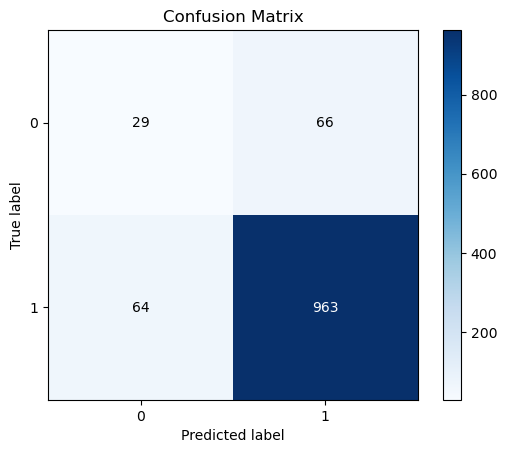

In [139]:
# plotting the confusion matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

From the confusion matrix plot we see that:

- True positive - 964/1027
- False Positive - 65/95
- True Negative - 30/95
- False Negative - 63/1027

In [140]:
# Print Text Representation
text_representation = tree.export_text(dt, 
                                       feature_names=(list(X.columns)))
print(text_representation)

|--- num_voted_users <= 39793.00
|   |--- num_user_for_reviews <= 281.50
|   |   |--- duration <= 100.50
|   |   |   |--- budget <= 3925000.00
|   |   |   |   |--- num_user_for_reviews <= 9.50
|   |   |   |   |   |--- content_rating_Unrated <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- content_rating_Unrated >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- num_user_for_reviews >  9.50
|   |   |   |   |   |--- title_year <= 2012.50
|   |   |   |   |   |   |--- gross <= 3899669.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- gross >  3899669.50
|   |   |   |   |   |   |   |--- gross <= 4156577.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- gross >  4156577.00
|   |   |   |   |   |   |   |   |--- num_voted_users <= 2150.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- num_voted_users >  2150.50
|   |   |   |   |   |   |   |   |   |--- class: 1
| 

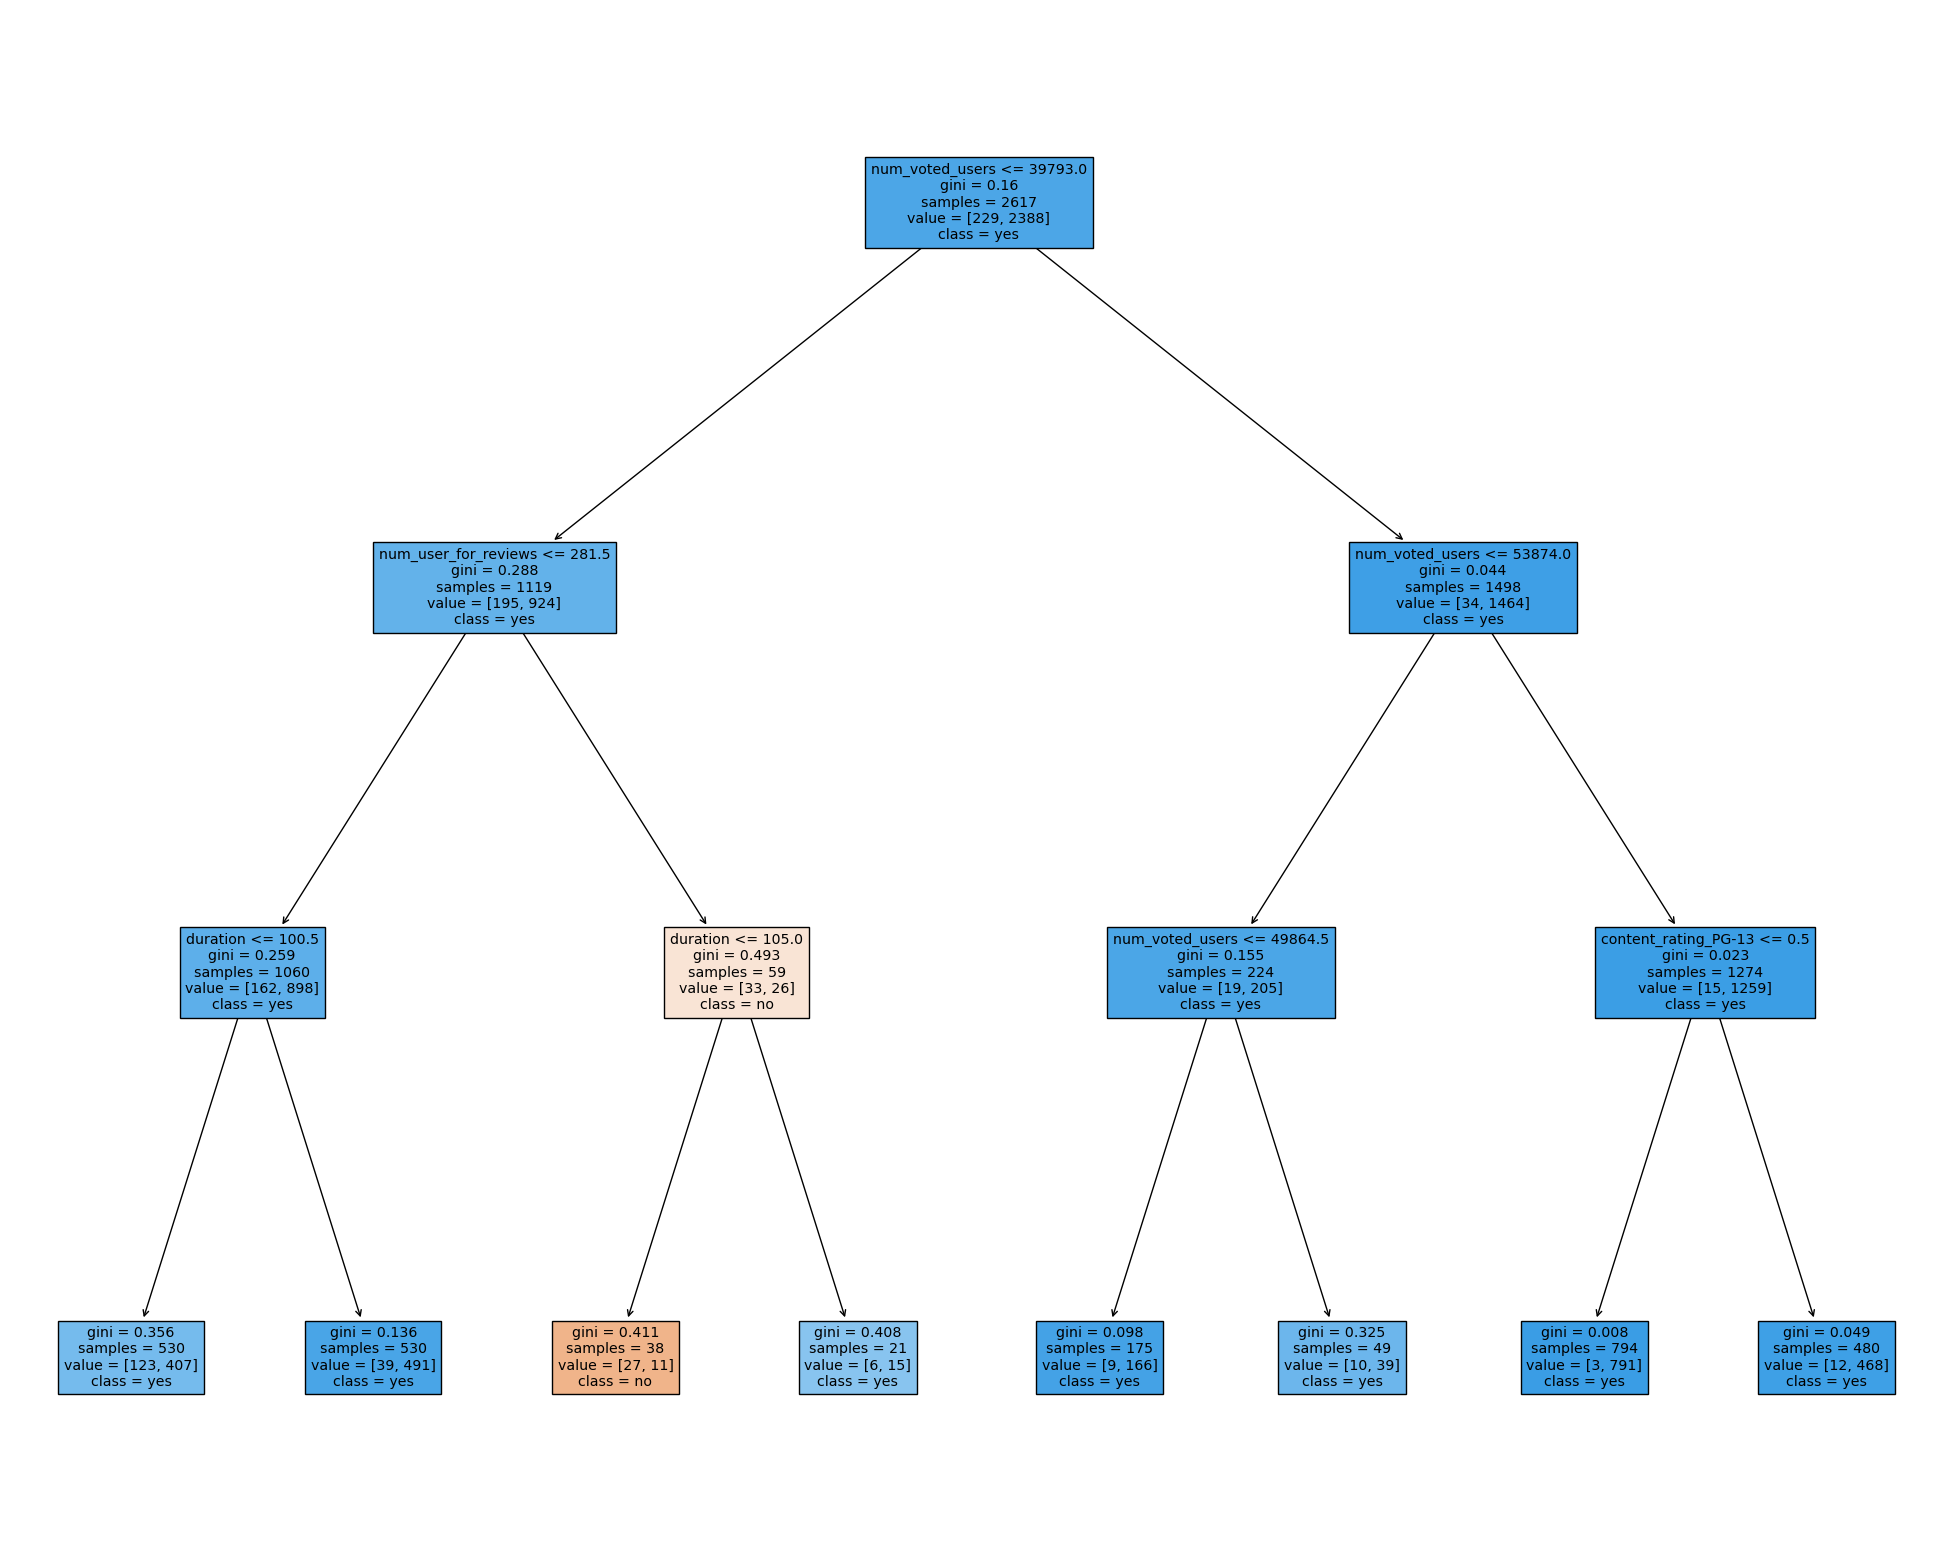

In [141]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_simple, 
                feature_names = list(X.columns), 
                class_names=['no','yes'], 
                filled = True);

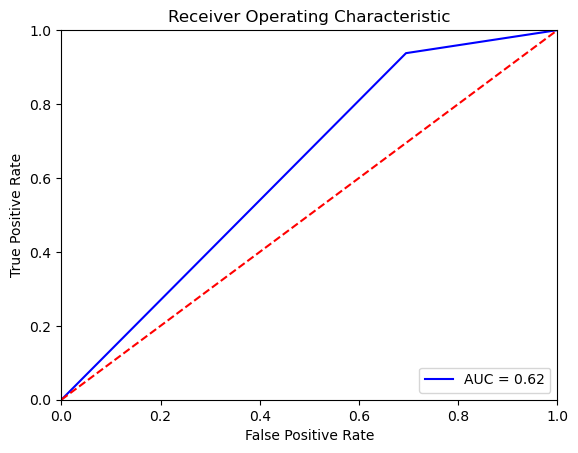

In [142]:
# calculate the fpr and tpr for all thresholds of the classification

preds = dt.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(dt_fpr, dt_tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [143]:
#Model evaluation
print("----------------Accuracy score----------------------------------------")
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("---------------------Confusion matrix-----------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("----------------------Classification report----------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("------------------------ROC/AUC Score--------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))
print("------------------------False Positive--------------------------------")
print("False-positive rate:", dt_fpr)
print("------------------------True Positive--------------------------------")
print("True-positive rate: ", dt_tpr)


----------------Accuracy score----------------------------------------
0.8841354723707665
---------------------Confusion matrix-----------------------------------
[[ 29  66]
 [ 64 963]]
----------------------Classification report----------------------------------
              precision    recall  f1-score   support

           0       0.31      0.31      0.31        95
           1       0.94      0.94      0.94      1027

    accuracy                           0.88      1122
   macro avg       0.62      0.62      0.62      1122
weighted avg       0.88      0.88      0.88      1122

------------------------ROC/AUC Score--------------------------------
0.6214728642443499
------------------------False Positive--------------------------------
False-positive rate: [0.         0.69473684 1.        ]
------------------------True Positive--------------------------------
True-positive rate:  [0.         0.93768257 1.        ]


### 2. K- Nearest Neighbors classifier

In [144]:
 # inititalize KNN algorithm
 # default is 5 neighbours
knn = KNeighborsClassifier()

#train using fit function
knn.fit(X_train,y_train)

KNeighborsClassifier()

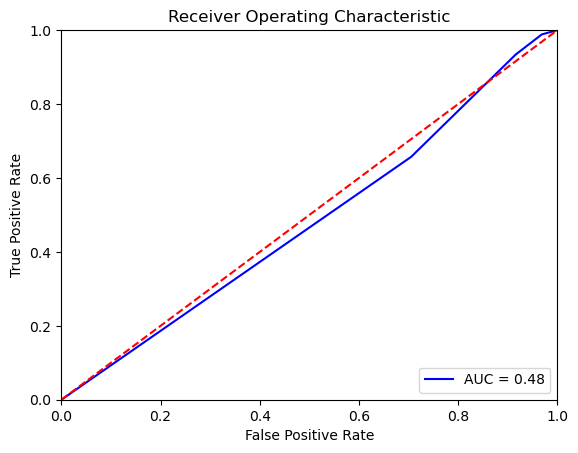

In [146]:
# calculate the fpr and tpr for all thresholds of the classification

preds = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(knn_fpr, knn_tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [147]:
print("----------------Accuracy score----------------------------------------")
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("---------------------Confusion matrix-----------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("----------------------classification report----------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("------------------------ROC/AUC Score--------------------------------")
print(metrics.roc_auc_score(y_test, knn.predict(X_test)))
print("------------------------False Positive--------------------------------")
print("False-positive rate:", knn_fpr)
print("------------------------False Positive--------------------------------")
print("True-positive rate: ", knn_tpr)

----------------Accuracy score----------------------------------------
0.9073083778966132
---------------------Confusion matrix-----------------------------------
[[   3   92]
 [  12 1015]]
----------------------classification report----------------------------------
              precision    recall  f1-score   support

           0       0.20      0.03      0.05        95
           1       0.92      0.99      0.95      1027

    accuracy                           0.91      1122
   macro avg       0.56      0.51      0.50      1122
weighted avg       0.86      0.91      0.88      1122

------------------------ROC/AUC Score--------------------------------
0.5099472146773946
------------------------False Positive--------------------------------
False-positive rate: [0.         0.70526316 0.91578947 0.96842105 1.        ]
------------------------False Positive--------------------------------
True-positive rate:  [0.         0.65725414 0.93378773 0.98831548 1.        ]


### 3. Logistice Regression MOdel

In [148]:
# develop logistic regression model with X_new (only three predictors or independent variables)

lr = LogisticRegression()
lr.fit(X_train,y_train)
#Model evaluation



LogisticRegression()

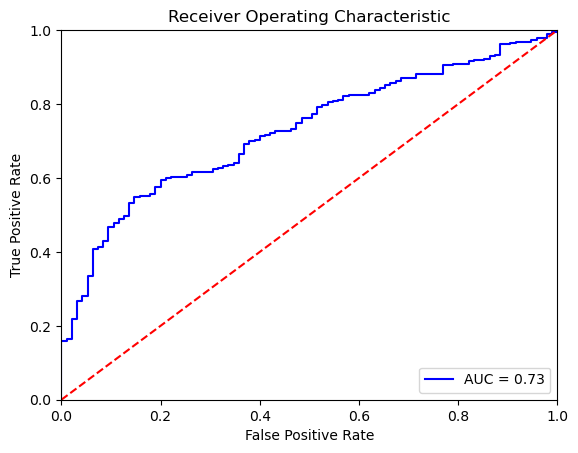

In [150]:
# calculate the fpr and tpr for all thresholds of the classification

preds = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(lr_fpr, lr_tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [151]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
print("----------------Accuracy score----------------------------------------")
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print("---------------------Confusion matrix-----------------------------------")
print(metrics.confusion_matrix(y_test, lr.predict(X_test))) 
print("----------------------classification report----------------------------------")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("------------------------ROC/AUC Score--------------------------------")
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))
print("------------------------False Positive--------------------------------")
print("False-positive rate:", lr_fpr)
print("------------------------False Positive--------------------------------")
print("True-positive rate: ", lr_tpr)

----------------Accuracy score----------------------------------------
0.9153297682709447
---------------------Confusion matrix-----------------------------------
[[   0   95]
 [   0 1027]]
----------------------classification report----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.92      1.00      0.96      1027

    accuracy                           0.92      1122
   macro avg       0.46      0.50      0.48      1122
weighted avg       0.84      0.92      0.87      1122

------------------------ROC/AUC Score--------------------------------
0.5
------------------------False Positive--------------------------------
False-positive rate: [0.         0.         0.         0.01052632 0.01052632 0.02105263
 0.02105263 0.03157895 0.03157895 0.04210526 0.04210526 0.05263158
 0.05263158 0.06315789 0.06315789 0.07368421 0.07368421 0.08421053
 0.08421053 0.09473684 0.09473684 0.10

### 4. Random Forest Model

In [152]:
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9162210338680927

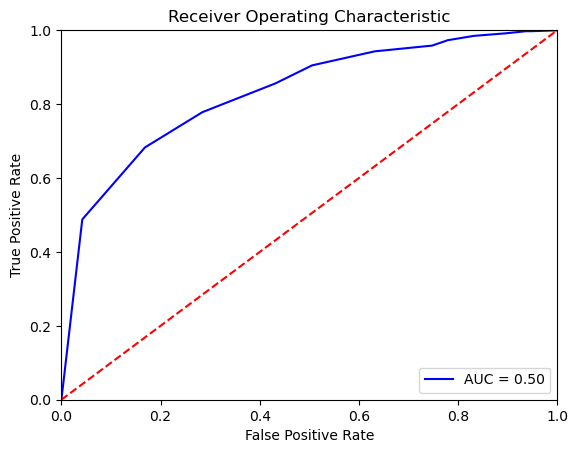

In [155]:
# calculate the fpr and tpr for all thresholds of the classification

preds = clf.predict_proba(X_test)[:,1]
clf_fpr, clf_tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(clf_fpr, clf_fpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(clf_fpr, clf_tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
print("------------------------Accuracy Score--------------------------------")
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print("------------------------Confusion matrix Score--------------------------------")
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("------------------------Classification report--------------------------------")
print(metrics.classification_report(y_test, clf.predict(X_test)))
print("------------------------ROC/AUC Score--------------------------------")
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))
print("------------------------False Positive--------------------------------")
print("False-positive rate:", clf_fpr)
print("------------------------True Positive--------------------------------")
print("True-positive rate: ", clf_tpr)

------------------------Accuracy Score--------------------------------
0.9162210338680927
------------------------Confusion matrix Score--------------------------------
[[  10   85]
 [   9 1018]]
------------------------Classification report--------------------------------
              precision    recall  f1-score   support

           0       0.53      0.11      0.18        95
           1       0.92      0.99      0.96      1027

    accuracy                           0.92      1122
   macro avg       0.72      0.55      0.57      1122
weighted avg       0.89      0.92      0.89      1122

------------------------ROC/AUC Score--------------------------------
0.5482498846922564
------------------------False Positive--------------------------------
False-positive rate: [0.         0.04210526 0.16842105 0.28421053 0.43157895 0.50526316
 0.63157895 0.74736842 0.77894737 0.83157895 0.89473684 0.93684211
 0.94736842 0.98947368 1.         1.        ]
------------------------True Positive-

### Plotting ROC for all Models, to identify the best model

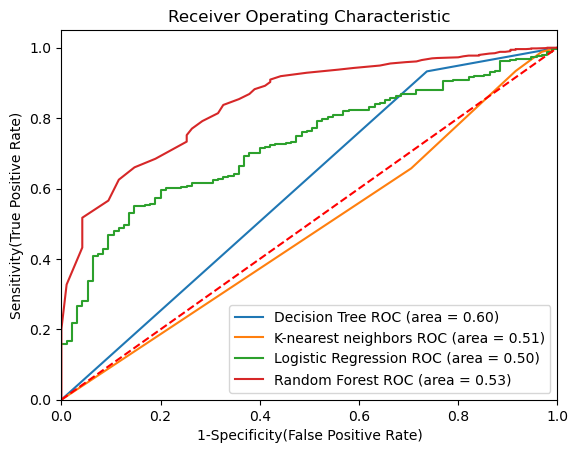

In [156]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-nearest neighbors',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

- Random Forest and Decision Tree curves are most steep suggesting they are the better models.
- The Random Forest model is the best model for this case.
- This can be attributed to that it combines multiple decision trees with the purpose to improve accuracy and accepts a parameter n_estimators which is the number of decision trees in the forest. Therefore logically combining multiple opinions is highly likely ro guarantee high accuracy thus its highly accurate perfomance
- Random Forest also achieves a high accuracy score of 91%

### What is your best classification model? What is the model accuracy? What is the true positive rate? What is the false positive rate? What is the ROC score?

In [158]:
print("Best Classification Model: Random Forest classifier")
print("----------------------------------------------------------------------")
print("Accuracy Score:",metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print("----------------------------------------------------------------------")
print("ROC/AUC Score:",metrics.roc_auc_score(y_test, clf.predict(X_test)))
print("----------------------------------------------------------------------")
print("False-positive rate:", clf_fpr)
print("-----------------------------------------------------------------------")
print("True-positive rate: ", clf_tpr)

Best Classification Model: Random Forest classifier
----------------------------------------------------------------------
Accuracy Score: 0.9162210338680927
----------------------------------------------------------------------
ROC/AUC Score: 0.5482498846922564
----------------------------------------------------------------------
False-positive rate: [0.         0.04210526 0.16842105 0.28421053 0.43157895 0.50526316
 0.63157895 0.74736842 0.77894737 0.83157895 0.89473684 0.93684211
 0.94736842 0.98947368 1.         1.        ]
-----------------------------------------------------------------------
True-positive rate:  [0.         0.48782863 0.68257059 0.77799416 0.85589094 0.90457644
 0.94255112 0.95813048 0.97273612 0.98442064 0.99123661 0.99707887
 0.99707887 0.99902629 0.99902629 1.        ]


### Clustering

In [159]:
df_movie_clustering = df_movie.copy()

### Preparing data for clustering

In [160]:
df_movie_clustering = df_movie_clustering.drop(columns=["content_rating"])
df_movie_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3739 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3739 non-null   float64
 1   duration                   3739 non-null   float64
 2   director_facebook_likes    3739 non-null   float64
 3   actor_3_facebook_likes     3739 non-null   float64
 4   actor_1_facebook_likes     3739 non-null   float64
 5   gross                      3739 non-null   float64
 6   num_voted_users            3739 non-null   int64  
 7   cast_total_facebook_likes  3739 non-null   int64  
 8   facenumber_in_poster       3739 non-null   float64
 9   num_user_for_reviews       3739 non-null   float64
 10  budget                     3739 non-null   float64
 11  title_year                 3739 non-null   float64
 12  actor_2_facebook_likes     3739 non-null   float64
 13  imdb_score                 3739 non-null   float64
 1

In [161]:
df_movie_clustering.var()

num_critic_for_reviews       1.523413e+04
duration                     5.133522e+02
director_facebook_likes      9.427660e+06
actor_3_facebook_likes       3.479155e+06
actor_1_facebook_likes       2.412314e+08
gross                        4.862675e+15
num_voted_users              2.291924e+10
cast_total_facebook_likes    3.641816e+08
facenumber_in_poster         4.178651e+00
num_user_for_reviews         1.686750e+05
budget                       5.129341e+16
title_year                   9.780925e+01
actor_2_facebook_likes       2.045601e+07
imdb_score                   1.112000e+00
aspect_ratio                 1.249789e-01
movie_facebook_likes         4.575266e+08
dtype: float64

#### Lets perform Normalization to ensure that the variables have consistent scale, for fairness during analysis

In [162]:
df_normalized = (df_movie_clustering - df_movie_clustering.mean()) / (df_movie_clustering.max() - df_movie_clustering.min())

In [163]:
df_normalized.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.685415,0.231313,-0.035068,0.004014,-0.010489,0.931278,0.462255,-0.010078,-0.031964,0.537542,0.015631,0.067395,-0.007786,0.186497,-0.022326,0.067990
1,0.166943,0.200597,-0.010589,0.010319,0.050449,0.338118,0.216665,0.056184,-0.031964,0.178578,0.020788,0.044923,0.021878,0.082601,0.016136,-0.026566
2,0.536401,0.128924,-0.035068,-0.026160,0.005136,0.194359,0.101055,0.000377,-0.008708,0.130347,0.016286,0.134810,-0.011750,0.043640,0.016136,0.216987
3,0.796253,0.183532,0.921454,0.966840,0.030136,0.520532,0.615020,0.145123,-0.031964,0.467765,0.016695,0.101103,0.153265,0.264419,0.016136,0.443348
5,0.363987,0.074317,-0.014415,-0.010116,-0.011051,0.027344,0.063378,-0.014587,-0.008708,0.079744,0.017817,0.101103,-0.010005,0.017666,0.016136,0.042202


#### Lets determine the optimal K Value

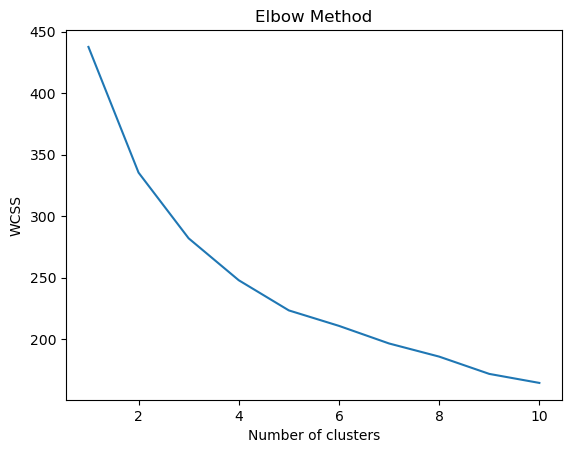

In [164]:
# WCSS: Within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',                     
                    n_init='auto', 
                    random_state=0)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The optimal value for K appears to be 5, This is the point where adding more clusters beyond this value will not provide a better fit.

## K-means algorithm clustering

In [165]:
# initialize Kmeans algorithm with two clusters and random_state of 0
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)

In [166]:
# train model
k_means.fit(df_normalized)

KMeans(n_clusters=5, random_state=0)

In [167]:
# show cluster labels
k_means.labels_

array([0, 0, 0, ..., 4, 4, 4])

In [168]:
#cluster centroids or centers
k_means.cluster_centers_

array([[ 2.97402342e-01,  6.50478383e-02, -2.22755994e-02,
         6.00575690e-02,  8.64968014e-03,  1.70847976e-01,
         1.83330760e-01,  1.67083733e-02,  1.00260915e-03,
         1.50939803e-01,  4.29519174e-03,  5.26105435e-02,
         2.27376267e-02,  1.28761594e-01,  5.62848582e-03,
         1.09974392e-01],
       [ 9.47900466e-02, -1.62979642e-03, -2.58687736e-02,
         3.46766688e-03,  3.71839868e-03,  1.90976992e-03,
         7.91493332e-03,  4.47843820e-03,  4.64205980e-04,
         7.52305983e-03,  1.13509843e-03,  6.88438180e-02,
         3.83953538e-03,  3.29466528e-02,  5.02180687e-03,
         1.15538101e-02],
       [ 1.00326078e-01,  5.33543713e-02,  6.06639410e-01,
         3.58098870e-02,  9.47643666e-03,  5.26142269e-02,
         1.04642332e-01,  1.42798477e-02, -9.13837639e-03,
         6.87052453e-02,  6.33255242e-04, -3.09545908e-02,
         1.48549790e-02,  1.08093763e-01,  2.09077665e-03,
         3.52970894e-02],
       [-9.23134295e-02, -3.97773290e

In [169]:
# convert to dataframe
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,2
4,0


In [170]:
# Join df_normalized & df1

df_movie_clustering = df_movie_clustering.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df_movie_clustering.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,2
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,0


In [171]:
# by size
df2.groupby('cluster').size()

cluster
0     285
1    1070
2     162
3    1008
4    1214
dtype: int64

#### Lets Develop Profiles for the clusters

In [172]:
# set X and y

y = df2['cluster']
X = df2.drop(['cluster'], axis=1)

In [173]:
#Let find the important features for clustering
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.9997325488098422

In [174]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values(by="importance",ascending=False)

,feature,importance
13,imdb_score,0.274153
0,num_critic_for_reviews,0.186680
11,title_year,0.116124
6,num_voted_users,0.108668
2,director_facebook_likes,0.083400
9,num_user_for_reviews,0.047592
15,movie_facebook_likes,0.045815
5,gross,0.028936
1,duration,0.025951
10,budget,0.020337


-  It appears the most important  variables to cluster this movie is imdb_score, num_critic_for_reviews, title_year, num_voted_users
-  We will pay attention to these variables when profiling the clusters

In [175]:
#Tabulate the mean values of each cluster in terms of different variables
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0,407.933333,129.284211,294.214035,2143.992982,13248.635088,1.821941e+08,414893.649123,22425.459649,1.417544,1098.178947,9.852688e+07,2007.684211,5117.768421,7.455439,2.194281,47652.631579
1,243.412150,109.747664,211.571028,842.425234,10092.614953,5.371568e+07,118486.158879,14393.694393,1.394393,372.633645,5.992476e+07,2009.128972,2528.729907,6.717664,2.185290,13303.848598
2,247.907407,125.858025,14759.259259,1586.296296,13777.759259,9.227670e+07,281930.506173,20830.574074,0.981481,682.154321,5.379449e+07,2000.246914,4037.845679,7.296296,2.141852,21590.253086
3,91.484127,98.570437,107.625992,537.734127,5120.086310,2.904867e+07,28335.277778,7705.657738,1.574405,161.909722,3.191210e+07,2003.956349,1093.415675,5.208135,2.069058,1196.198413
4,93.278418,113.762768,169.672158,444.950577,5659.229819,3.441634e+07,60752.924217,8143.981054,1.233114,218.748764,3.223452e+07,1996.077430,1291.224876,6.939292,2.056269,1768.442339


### Cluster Profiling
1. Cluster 0 : High imdb score,high number of critic reviews, title year around 2007, high number of voted users. 

3. Cluster 1 : Moderate imdb score, lower number of critics reviews, title year around 2009, lower number of voted users.

4. Cluster 2 : High imdb score, lower number of critics, high facebook likes,title year 2000, a good number of  voted users.

5. Cluster 3 : Low imdb score, low number of critic reviews, title year around 2004, low number of voted users

6. Cluster 4 : Moderate imdb score, low number of critic reviews, title year around 1996

## Executive Summary

Correlation Analysis
- Higher budget correlates with higher gross revenue.
- Higher number of voted users tends to correlate with higher revenue.
- Movies with more critics reviews tend to correlate with higher number of users voting.
- Higher number of voted users correlates with more movie facebook likes.
- There is some correlation between director facebook likes with number of critics review.
- Face number in poster has negative correlation with number of reviews,voted users and gross suggesting that it has no influence on those features.

Regression Analysis
- Random Forest Model Achieved lower MSE (0.47) and higher R-squared (0.549) than Linear Regression Model, Lasso and Feature Selection.
- All Models had generally low R-squared, this suggests that they explained only a little amount of the variance in the imdb scores.
- The low perfomance of the model suggests that it may be difficult to predict imdb scores accurately.
- Random Forest Model provides the best prediction for imdb score as it has the lowest MSE indicating its predictions had the smallest squared errors between the actual and predicted values.

Classification Analysis
- Random Forest classifier achieved the highest accuracy score of 91%.
- The high accuracy suggests that can be effectively and reliably be used to  categorize movies into their respective categories based on their imdb scores.
  
Cluster Analysis

Each cluster represents  movies grouped based on similar features like IMDb scores, audience reviews and perception , and release years.
These clusters could aid in improving marketing strategies for movies that have similar profiles.

 1. Cluster 0 : High imdb score,high number of critic reviews, title year around 2007, high number of voted users.
 2. Cluster 1 : Moderate imdb score, lower number of critics reviews, title year around 2009, lower number of voted users.
 3. Cluster 2 : High imdb score, lower number of critics, high facebook likes,title year 2000, a good number of voted users.
 4. Cluster 3 : Low imdb score, low number of critic reviews, title year around 2004, low number of voted users
 5. Cluster 4 : Moderate imdb score, low number of critic reviews, title year around 1996


